Examine the performance of random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [2]:
TRAIN_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTrain.csv"
TEST_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTest.csv"

## DATA SETUP

In [3]:
trainPD = pd.read_csv(TRAIN_DATA_PATH)
testPD = pd.read_csv(TEST_DATA_PATH)

trainPD = trainPD.fillna(0)
testPD = testPD.fillna(0)

In [4]:
label_cols = ['target']

# relevant features chosen based on 1) data context and 
# 2) the SequentialFeatureSelector in regression.ipynb
feature_cols = [
                'precipitable_water_entire_atmosphere',
                'relative_humidity_2m_above_ground',
                'temperature_2m_above_ground',
                'u_component_of_wind_10m_above_ground',
                'v_component_of_wind_10m_above_ground',
                'L3_NO2_NO2_column_number_density',
                'L3_NO2_NO2_slant_column_number_density',
                'L3_NO2_absorbing_aerosol_index',
                'L3_NO2_tropopause_pressure',
                'L3_O3_O3_column_number_density',
                'L3_CO_CO_column_number_density',
                'L3_CO_cloud_height',
                'L3_CO_H2O_column_number_density',
                'L3_HCHO_tropospheric_HCHO_column_number_density',
                'L3_SO2_SO2_column_number_density',
]

In [5]:
# partition features matrix and target matrix 
X = trainPD[feature_cols]
y = trainPD[label_cols]

# split training data into training and validation (default 75% and 25% split)
Xtrain, Xval, ytrain, yval = train_test_split(X, y, random_state=42)

# MODEL TRAINING

In [6]:
def eval_model(model, data):
  Xtrain, ytrain, Xval, yval = data
  model.fit(Xtrain, ytrain['target'])
  # print(type(model.predict(Xval)))
  ypred = model.predict(Xval).flatten()
  ypred = pd.Series(ypred, name="predicted")
  yval_reindexed = yval.reset_index().drop('index', axis=1)
  val_performance = pd.concat([yval_reindexed, ypred], axis=1)
  val_performance['error']=val_performance['predicted']-val_performance['target']
  RMSE = np.sqrt(mean_squared_error(
      val_performance['target'], val_performance['predicted']))
  
  return val_performance, RMSE

data = (Xtrain, ytrain, Xval, yval)

def visualize_error(val_performance):
  fig = plt.figure(figsize=(6, 6))
  ax = fig.add_subplot(111)
  plt.scatter(x=val_performance['target'], y=val_performance['target'], alpha=0.2)
  plt.scatter(x=val_performance['target'], y=val_performance['predicted'], 
              alpha=0.2, c='orange')
  ax.set_aspect('equal')
  ax.set_xlabel('true')
  ax.set_ylabel('predicted')
  ax.legend(['true', 'predicted'])

In [7]:
forest = RandomForestRegressor(n_estimators=150)
# using more estimators increases computation time without significantly
# improving results

scoring = {'negRMSE' : 'neg_root_mean_squared_error',
           'R2' : 'r2',
           'max_error' : 'max_error'}

scores = cross_validate(forest, X, y['target'], cv=5, scoring=scoring)

# print(scores.keys())
print('-RMSE: ', scores['test_negRMSE'])
print('R2: ', scores['test_R2'])
print('max error: ', scores['test_max_error'])

-RMSE:  [-38.46700853 -33.21448652 -33.12878994 -38.58160197 -36.04148859]
R2:  [0.34143154 0.38059373 0.38417776 0.45113906 0.43330445]
max error:  [-781.076      -602.58       -291.63333333 -243.06       -391.04666667]


In [8]:
val_performance, RMSE = eval_model(forest, data)

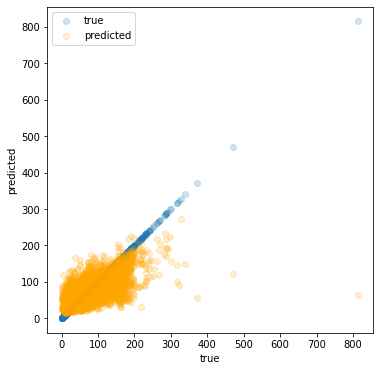

In [9]:
visualize_error(val_performance)

In [10]:
# TODO: visualize decision tree classification